In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
im_path = 'sky_castle.jpg'
im_bgr  = cv2.imread(im_path)
im_gray  = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)

(<Axes: >, <matplotlib.image.AxesImage at 0x2221f27c8e0>)

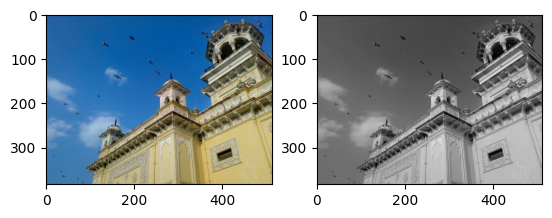

In [8]:
plt.subplot(1,2,1), plt.imshow(im_bgr[:,:,::-1])
plt.subplot(1,2,2), plt.imshow(im_gray, cmap='gray')

In [9]:
hist = cv2.calcHist([im_gray], channels =[0], mask = None, histSize=[256],ranges=[0.0,256.0]) 
print("sum:", np.sum(hist), " = res:", im_gray.shape[0]*im_gray.shape[1])

sum: 196608.0  = res: 196608


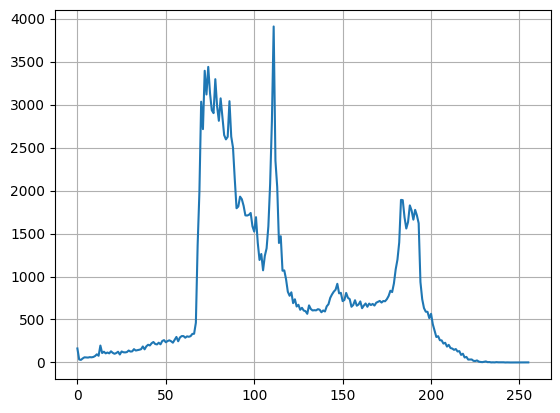

In [10]:
plt.plot(hist)
plt.grid()

In [11]:
im_hsv = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2HSV)

In [12]:
hist = cv2.calcHist([im_hsv], channels =[0,1], mask = None, histSize=[18, 25],ranges=[0.,181., 0., 256.]) 
print("sum:", np.sum(hist), " = res:", im_hsv.shape[0]*im_hsv.shape[1])


sum: 196608.0  = res: 196608


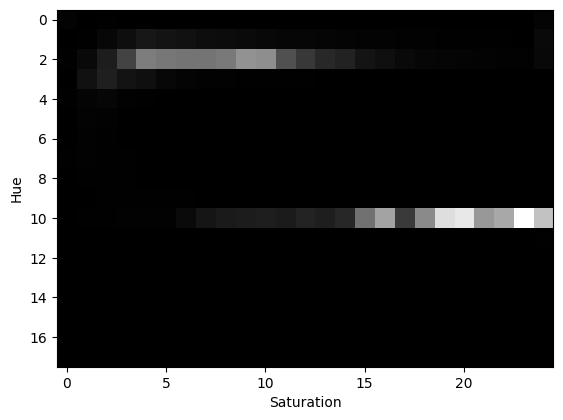

In [13]:
plt.imshow(hist, cmap='gray')
plt.xlabel('Saturation')
plt.ylabel('Hue')
#plt.grid()
plt.show()   

In [2]:
im_path = 'tsukuba_l.png'
im_src = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE) 
print(im_src.shape)

(288, 384)


In [4]:
# down scale 
imsGaussian = [im_src]  
for s in range(1,5):
    im = cv2.pyrDown(imsGaussian[s-1])
    print(im.shape)
    imsGaussian.append(im)

ims2 = [ ]  
for s in range(4,0,-1):
    im = cv2.pyrUp(imsGaussian[s])
    print(im.shape)
    ims2.insert(0,im)


(144, 192)
(72, 96)
(36, 48)
(18, 24)
(36, 48)
(72, 96)
(144, 192)
(288, 384)


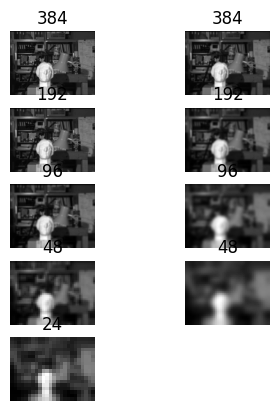

In [6]:
for s in range(0,5):
        plt.subplot(5, 3, s*3 + 1), plt.imshow(imsGaussian[s], cmap='gray')
        plt.title(str(imsGaussian[s].shape[1])), plt.axis('off')
        if s != 4:
            plt.subplot(5, 3, s*3 + 2), plt.imshow(ims2[s], cmap='gray') 
            plt.title(str(ims2[s].shape[1])), plt.axis('off')
        #plt.subplot(5, 3, s*3 + 3), plt.imshow(imsLaplacian[s], cmap='gray')
        #plt.title(str(imsLaplacian[s].shape[0])), plt.axis('off')


In [7]:
imsLaplacian = []  
for s in range(0,4):
    im = cv2.subtract(imsGaussian[s],ims2[s])
    imsLaplacian.append(im)
    #print(im.shape)
imsLaplacian.append(imsGaussian[4])     


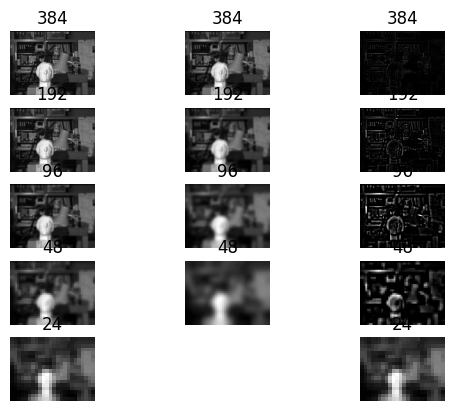

In [8]:
for s in range(0,5):
        plt.subplot(5, 3, s*3 + 1), plt.imshow(imsGaussian[s], cmap='gray')
        plt.title(str(imsGaussian[s].shape[1])), plt.axis('off')
        if s != 4:
            plt.subplot(5, 3, s*3 + 2), plt.imshow(ims2[s], cmap='gray') 
            plt.title(str(ims2[s].shape[1])), plt.axis('off')
        plt.subplot(5, 3, s*3 + 3), plt.imshow(imsLaplacian[s], cmap='gray')
        plt.title(str(imsLaplacian[s].shape[1])), plt.axis('off')